In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import array

In [2]:
# 读取数据
hbg_olduser_index = pd.read_table('./files/hbg_olduser_index.txt')
hbg_olduser_index.head()

,muid,imei_md5,oaid,origin_imei,os_type,vcpv,vppv_esf,active_days_xf,active_days_esf,income_xf,income_esf,guanzhu_xf,guanzhu_esf,session_num_xf,session_num_esf,takelook_order_xf,takelook_order_esf,cal_dt
0,"a-ajk,00014a4953f77538,00014a4953f77538",00014a4953f77538,CAA5D2FD29234A0794E8676F3035E37D804632c378704c...,863131045806931,android,6,0,5,0,0.000000,0.000000,0,0,0,0,0,0,2021-05-01
1,"a-ajk,0003e26f8ea58d2f,",0003e26f8ea58d2f,fbafbcf7-7eef-27f3-eb7e-d97f6ddbb97b,869714037405210,android,3,9,2,2,0.914711,0.331979,0,0,0,0,0,0,2021-05-01
2,"a-ajk,000d853ed147247b,000d853ed147247b",000d853ed147247b,7d8b7ec6b9cac0ed,NaN,android,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,2021-05-01
3,"a-ajk,000e9d57fdff39fe,000e9d57fdff39fe",000e9d57fdff39fe,bffde774-5aaf-cd19-9f67-fbc7e7ecdf74,NaN,android,10,0,6,0,0.554513,0.000000,0,0,0,0,0,0,2021-05-01
4,"a-ajk,0012be627b2ed132,0012be627b2ed132",0012be627b2ed132,b85ec8a5f48b5df1,NaN,android,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,2021-05-01


In [3]:
hbg_xf_index = hbg_olduser_index.loc[:, ['muid','imei_md5','oaid','origin_imei','os_type','vcpv','guanzhu_xf','session_num_xf']]
hbg_xf_index.head()

,muid,imei_md5,oaid,origin_imei,os_type,vcpv,guanzhu_xf,session_num_xf
0,"a-ajk,00014a4953f77538,00014a4953f77538",00014a4953f77538,CAA5D2FD29234A0794E8676F3035E37D804632c378704c...,863131045806931,android,6,0,0
1,"a-ajk,0003e26f8ea58d2f,",0003e26f8ea58d2f,fbafbcf7-7eef-27f3-eb7e-d97f6ddbb97b,869714037405210,android,3,0,0
2,"a-ajk,000d853ed147247b,000d853ed147247b",000d853ed147247b,7d8b7ec6b9cac0ed,NaN,android,0,0,0
3,"a-ajk,000e9d57fdff39fe,000e9d57fdff39fe",000e9d57fdff39fe,bffde774-5aaf-cd19-9f67-fbc7e7ecdf74,NaN,android,10,0,0
4,"a-ajk,0012be627b2ed132,0012be627b2ed132",0012be627b2ed132,b85ec8a5f48b5df1,NaN,android,0,0,0


In [4]:
hbg_esf_index = hbg_olduser_index.loc[:, ['muid','imei_md5','oaid','origin_imei','os_type','vppv_esf','guanzhu_esf','session_num_esf','takelook_order_esf']]
hbg_esf_index.head()

,muid,imei_md5,oaid,origin_imei,os_type,vppv_esf,guanzhu_esf,session_num_esf,takelook_order_esf
0,"a-ajk,00014a4953f77538,00014a4953f77538",00014a4953f77538,CAA5D2FD29234A0794E8676F3035E37D804632c378704c...,863131045806931,android,0,0,0,0
1,"a-ajk,0003e26f8ea58d2f,",0003e26f8ea58d2f,fbafbcf7-7eef-27f3-eb7e-d97f6ddbb97b,869714037405210,android,9,0,0,0
2,"a-ajk,000d853ed147247b,000d853ed147247b",000d853ed147247b,7d8b7ec6b9cac0ed,NaN,android,0,0,0,0
3,"a-ajk,000e9d57fdff39fe,000e9d57fdff39fe",000e9d57fdff39fe,bffde774-5aaf-cd19-9f67-fbc7e7ecdf74,NaN,android,0,0,0,0
4,"a-ajk,0012be627b2ed132,0012be627b2ed132",0012be627b2ed132,b85ec8a5f48b5df1,NaN,android,0,0,0,0


# 一、新房指标部分

## 1、先看新房整体数据的统计描述

In [5]:
hbg_xf_index.describe()

,vcpv,guanzhu_xf,session_num_xf
count,2.183818e+06,2.183818e+06,2.183818e+06
mean,4.311956e+00,1.020873e-02,1.549973e-01
std,1.085666e+01,1.460097e-01,4.846358e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,0.000000e+00,0.000000e+00
max,1.098000e+03,3.300000e+01,2.429000e+03


## 2、再看新房vcpv数据分布

In [6]:
# 存放vcpv数据
vcpv_array = np.array(hbg_xf_index.loc[:,'vcpv'])
vcpv_not0_array = vcpv_array[vcpv_array>0]  # vcpv大于0的vcpv分布情况

In [8]:
# 存放vcpv百分位数,90%的数据都在10以下
# 箱线图剔除异常值的方式不可用，因为分布严重左偏——会把大部分数据判断为异常值
vcpv_pct = np.array([np.percentile(vcpv_not0_array, 10)
                       ,np.percentile(vcpv_not0_array, 20)
                       ,np.percentile(vcpv_not0_array, 30)
                       ,np.percentile(vcpv_not0_array, 40)
                       ,np.percentile(vcpv_not0_array, 50)
                       ,np.percentile(vcpv_not0_array, 60)
                       ,np.percentile(vcpv_not0_array, 70)
                       ,np.percentile(vcpv_not0_array, 80)
                       ,np.percentile(vcpv_not0_array, 90)
                       ,np.percentile(vcpv_not0_array, 99)])
vcpv_pct

array([ 1.,  1.,  2.,  2.,  3.,  4.,  5.,  7., 10., 44.])

In [9]:
# 剔除异常值之后的vcpv统计值
vcpv_df = pd.DataFrame(hbg_xf_index.loc[:,'vcpv'])
norm_vcpv_df = vcpv_df[vcpv_df<=44]
norm_vcpv_df.describe()

,vcpv
count,2.166792e+06
mean,3.642452e+00
std,5.063221e+00
min,0.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,5.000000e+00
max,4.400000e+01


Text(0.5, 1.0, 'vcpv分布 箱线图')

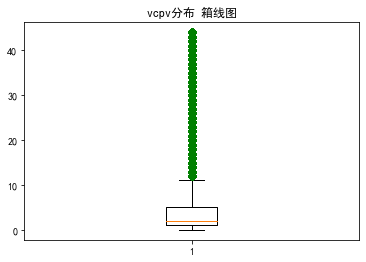

In [10]:
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号


# 箱线图，异常值判断--不太符合业务场景，用户数据分布过于不均匀，非正态分布
fig, ax = plt.subplots()

normal_vcpv_array=vcpv_array[vcpv_array<=44]
# change outlier point symbols
ax.boxplot(normal_vcpv_array, 0, 'gD')
ax.set_title('vcpv分布 箱线图')

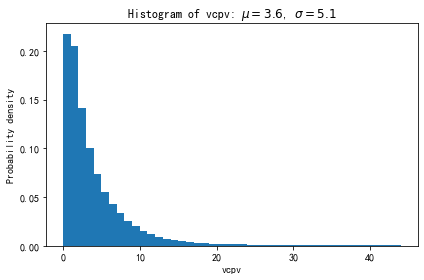

In [11]:
# 查看vcpv分布情况-直方图

num_bins = 44
mu = 3.6  # mean of distribution
sigma = 5.1  # standard deviation of distribution

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(normal_vcpv_array, num_bins, density=True)

ax.set_xlabel('vcpv')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of vcpv: $\mu=3.6$, $\sigma=5.1$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


## 3、再看新房关注数的数据分布

In [12]:
# 存放guanzhu_xf数据
xfgz_array = np.array(hbg_xf_index.loc[:,'guanzhu_xf'])
xfgz_not0_array = xfgz_array[xfgz_array>0]

In [14]:
# 存放guanzhu_xf百分位数,99%的数据都在5以下
xfgz_not0_pct = np.array([np.percentile(xfgz_not0_array, 10)
                       ,np.percentile(xfgz_not0_array, 20)
                       ,np.percentile(xfgz_not0_array, 30)
                       ,np.percentile(xfgz_not0_array, 40)
                       ,np.percentile(xfgz_not0_array, 50)
                       ,np.percentile(xfgz_not0_array, 60)
                       ,np.percentile(xfgz_not0_array, 70)
                       ,np.percentile(xfgz_not0_array, 80)
                       ,np.percentile(xfgz_not0_array, 90)
                       ,np.percentile(xfgz_not0_array, 99)])
xfgz_not0_pct

array([1., 1., 1., 1., 1., 1., 1., 1., 2., 5.])

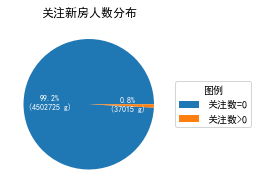

In [15]:
# 查看新房关注数的分布情况
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["4502725个","37015个"]

data = [4502725, 37015]
ingredients = ["关注数=0","关注数>0"]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="图例",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("关注新房人数分布")

plt.show()

## 4、再看下连接数分布

In [16]:
# 存放连接数据
xflj_array = np.array(hbg_xf_index.loc[:,'session_num_xf'])
xflj_not0_array = xflj_array[xflj_array>0]

In [17]:
# 存放连接百分位数,99%的数据都在20以下
xflj_not0_pct = np.array([np.percentile(xflj_not0_array, 10)
                       ,np.percentile(xflj_not0_array, 20)
                       ,np.percentile(xflj_not0_array, 30)
                       ,np.percentile(xflj_not0_array, 40)
                       ,np.percentile(xflj_not0_array, 50)
                       ,np.percentile(xflj_not0_array, 60)
                       ,np.percentile(xflj_not0_array, 70)
                       ,np.percentile(xflj_not0_array, 80)
                       ,np.percentile(xflj_not0_array, 90)
                       ,np.percentile(xflj_not0_array, 99)])
xflj_not0_pct

array([ 1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  4., 20.])

In [18]:
# 剔除异常值之后的连接数统计值

xflj_df = pd.DataFrame(hbg_xf_index.loc[:,'session_num_xf'])
norm_xflj_df = xflj_df[xflj_df<=20]
norm_xflj_df.describe()

,session_num_xf
count,2.182651e+06
mean,1.099791e-01
std,6.832769e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.000000e+01


Text(0.5, 1.0, '新房连接数分布 箱线图')

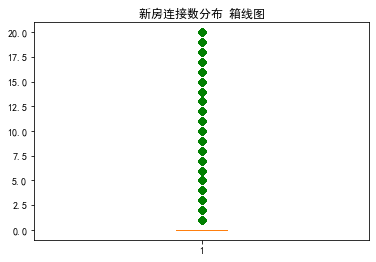

In [19]:
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号


# 箱线图，异常值判断--不太符合业务场景，用户数据分布过于不均匀，非正态分布
fig, ax = plt.subplots()

normal_xflj_array=xflj_array[xflj_array<=20]
# change outlier point symbols
ax.boxplot(normal_xflj_array, 0, 'gD')
ax.set_title('新房连接数分布 箱线图')

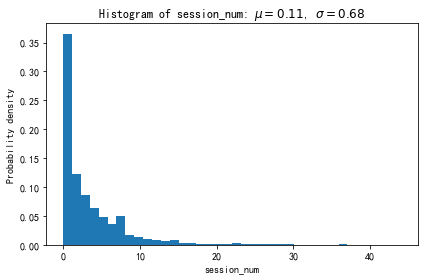

In [20]:
# 查看新房连接数分布情况-直方图

num_bins = 38
mu = 0.11  # mean of distribution
sigma = 0.68  # standard deviation of distribution

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(normal_vcpv_array, num_bins, density=True)

ax.set_xlabel('session_num')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of session_num: $\mu=0.11$, $\sigma=0.68$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


In [ ]:
# #定义熵值法函数
# def cal_weight(x):
#     '''熵值法计算变量的权重'''
#     # 标准化
#     x = x.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))
 
#     # 求k
#     rows = x.index.size  # 行
#     cols = x.columns.size  # 列
#     k = 1.0 / math.log(rows)
 
#     lnf = [[None] * cols for i in range(rows)]
 
#     # 矩阵计算--
#     # 信息熵
#     # p=array(p)
#     x = array(x)
#     lnf = [[None] * cols for i in range(rows)]
#     lnf = array(lnf)
#     for i in range(0, rows):
#         for j in range(0, cols):
#             if x[i][j] == 0:
#                 lnfij = 0.0
#             else:
#                 p = x[i][j] / x.sum(axis=0)[j]
#                 lnfij = math.log(p) * p * (-k)
#             lnf[i][j] = lnfij
#     lnf = pd.DataFrame(lnf)
#     E = lnf
 
#     # 计算冗余度
#     d = 1 - E.sum(axis=0)
#     # 计算各指标的权重
#     w = [[None] * 1 for i in range(cols)]
#     for j in range(0, cols):
#         wj = d[j] / sum(d)
#         w[j] = wj
#         # 计算各样本的综合得分,用最原始的数据
    
#     w = pd.DataFrame(w)
#     return w

In [ ]:
# df = hbg_olduser_index.loc[:, ['vcpv','session_num_xf']]
# w = cal_weight(df)  # 调用cal_weight
# w.index = df.columns
# w.columns = ['weight']
# print(w)

## 5、看下新房看房订单分布-新房没这业务。。。